# Glyoxylate Shunt Chemical Reaction Network

The code provided simulates the glyoxylate shunt reactions using ordinary differential equations (ODEs) and solves the system of equations over a specified time period. It calculates the concentrations of acetyl-CoA and succinate over time based on the defined reaction rates and initial conditions.

The result of running the code is a plot that shows the concentration profiles of acetyl-CoA and succinate over time. The x-axis represents time, and the y-axis represents the concentration of metabolites.

The glyoxylate shunt is a metabolic pathway found in certain microorganisms that enables them to utilize two-carbon compounds, such as acetyl-CoA, as a carbon source for growth. In the simulation, the ODE system represents the dynamics of the glyoxylate shunt reactions.

The reaction rates (k1, k2, k3, k4) and initial conditions (acetyl-CoA and succinate concentrations) are defined in the code and can be adjusted according to the specific system you are studying. The concentrations are calculated by solving the ODE system using the odeint function from the scipy.integrate module.

The resulting plot shows how the concentrations of acetyl-CoA and succinate change over time, providing insights into the behavior of the glyoxylate shunt pathway under the specified conditions.

In [ ]:
! pip install networkx

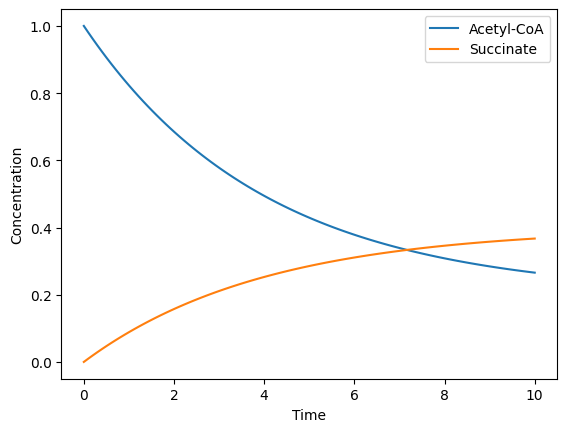

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the ODE system for the glyoxylate shunt
def glyoxylate_shunt(y, t, k1, k2, k3, k4, nadh, nad, coa):
    acetyl_coa, succinate = y
    rate1 = k1 * acetyl_coa * nad * coa - k2 * succinate * nadh
    rate2 = k3 * nadh - k4 * nad * nadh
    d_acetyl_coa = -2 * rate1
    d_succinate = rate1
    return [d_acetyl_coa, d_succinate]

# Set the initial conditions and parameters
initial_conditions = [1.0, 0.0]  # [acetyl-CoA, succinate]
k1 = 0.1
k2 = 0.05
k3 = 0.02
k4 = 0.03
nadh = 1.0
nad = 1.0
coa = 1.0

# Set the time points for simulation
t = np.linspace(0, 10, 100)  # Simulation time from 0 to 10 with 100 time points

# Solve the ODE system
solution = odeint(glyoxylate_shunt, initial_conditions, t, args=(k1, k2, k3, k4, nadh, nad, coa))

# Extract the concentrations from the solution
acetyl_coa_conc = solution[:, 0]
succinate_conc = solution[:, 1]

# Plot the concentrations over time
plt.plot(t, acetyl_coa_conc, label='Acetyl-CoA')
plt.plot(t, succinate_conc, label='Succinate')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()


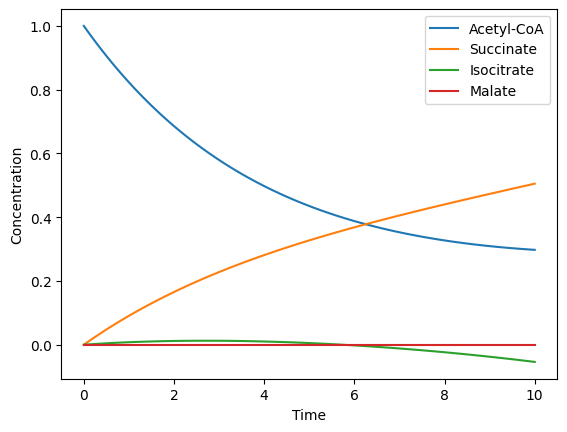

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the ODE system for the glyoxylate shunt
def glyoxylate_shunt(y, t, k1, k2, k3, k4, k5, nadh, nad, coa, nadp):
    acetyl_coa, succinate, isocitrate, malate = y
    rate1 = k1 * acetyl_coa * nad * coa - k2 * succinate * nadh
    rate2 = k3 * nadh - k4 * nad * nadh
    rate3 = k5 * isocitrate * nadp - k2 * succinate * nadh
    rate4 = k3 * nadh - k4 * nad * nadh
    d_acetyl_coa = -2 * rate1
    d_succinate = rate1 - rate3
    d_isocitrate = -rate2 + rate3
    d_malate = rate2 - rate4
    return [d_acetyl_coa, d_succinate, d_isocitrate, d_malate]

# Set the initial conditions and parameters
initial_conditions = [1.0, 0.0, 0.0, 0.0]  # [acetyl-CoA, succinate, isocitrate, malate]
k1 = 0.1
k2 = 0.05
k3 = 0.02
k4 = 0.03
k5 = 0.04
nadh = 1.0
nad = 1.0
coa = 1.0
nadp = 1.0

# Set the time points for simulation
t = np.linspace(0, 10, 100)  # Simulation time from 0 to 10 (dimensionless) with 100 time points

# Solve the ODE system
solution = odeint(glyoxylate_shunt, initial_conditions, t, args=(k1, k2, k3, k4, k5, nadh, nad, coa, nadp))

# Extract the concentrations from the solution
acetyl_coa_conc = solution[:, 0]
succinate_conc = solution[:, 1]
isocitrate_conc = solution[:, 2]
malate_conc = solution[:, 3]

# Plot the concentrations over time
plt.plot(t, acetyl_coa_conc, label='Acetyl-CoA')
plt.plot(t, succinate_conc, label='Succinate')
plt.plot(t, isocitrate_conc, label='Isocitrate')
plt.plot(t, malate_conc, label='Malate')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()


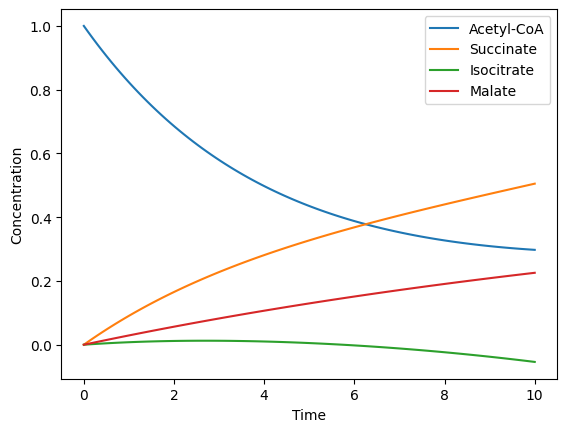

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the ODE system for the glyoxylate shunt
def glyoxylate_shunt(y, t, k1, k2, k3, k4, k5, k6, nadh, nad, coa, nadp, nadph):
    acetyl_coa, succinate, isocitrate, malate = y
    rate1 = k1 * acetyl_coa * nad * coa - k2 * succinate * nadh
    rate2 = k3 * nadh - k4 * nad * nadh
    rate3 = k5 * isocitrate * nadp - k2 * succinate * nadh
    rate4 = k3 * nadh - k4 * nad * nadh
    rate5 = k6 * malate * nadph - k4 * nad * nadh
    d_acetyl_coa = -2 * rate1
    d_succinate = rate1 - rate3
    d_isocitrate = -rate2 + rate3
    d_malate = rate2 - rate4 - rate5
    return [d_acetyl_coa, d_succinate, d_isocitrate, d_malate]

# Set the initial conditions and parameters
initial_conditions = [1.0, 0.0, 0.0, 0.0]  # [acetyl-CoA, succinate, isocitrate, malate]
k1 = 0.1
k2 = 0.05
k3 = 0.02
k4 = 0.03
k5 = 0.04
k6 = 0.06
nadh = 1.0
nad = 1.0
coa = 1.0
nadp = 1.0
nadph = 1.0

# Set the time points for simulation
t = np.linspace(0, 10, 100)  # Simulation time from 0 to 10 (dimensionless) with 100 time points

# Solve the ODE system
solution = odeint(glyoxylate_shunt, initial_conditions, t, args=(k1, k2, k3, k4, k5, k6, nadh, nad, coa, nadp, nadph))

# Extract the concentrations from the solution
acetyl_coa_conc = solution[:, 0]
succinate_conc = solution[:, 1]
isocitrate_conc = solution[:, 2]
malate_conc = solution[:, 3]

# Plot the concentrations over time
plt.plot(t, acetyl_coa_conc, label='Acetyl-CoA')
plt.plot(t, succinate_conc, label='Succinate')
plt.plot(t, isocitrate_conc, label='Isocitrate')
plt.plot(t, malate_conc, label='Malate')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()


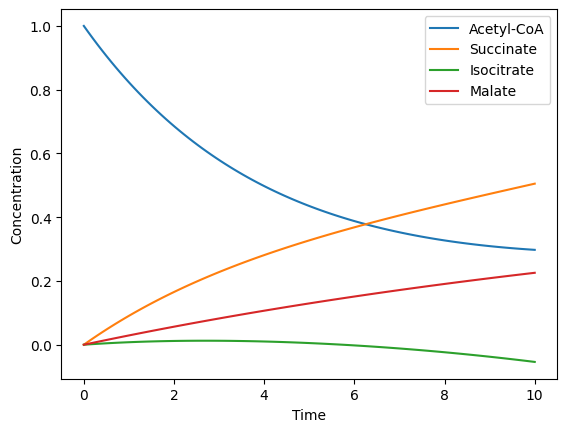

In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the ODE system for the glyoxylate shunt
def glyoxylate_shunt(y, t, params):
    acetyl_coa, succinate, isocitrate, malate = y
    k1 = params['k1']
    k2 = params['k2']
    k3 = params['k3']
    k4 = params['k4']
    k5 = params['k5']
    k6 = params['k6']
    nadh = params['nadh']
    nad = params['nad']
    coa = params['coa']
    nadp = params['nadp']
    nadph = params['nadph']
    
    rate1 = k1 * acetyl_coa * nad * coa - k2 * succinate * nadh
    rate2 = k3 * nadh - k4 * nad * nadh
    rate3 = k5 * isocitrate * nadp - k2 * succinate * nadh
    rate4 = k3 * nadh - k4 * nad * nadh
    rate5 = k6 * malate * nadph - k4 * nad * nadh
    
    d_acetyl_coa = -2 * rate1
    d_succinate = rate1 - rate3
    d_isocitrate = -rate2 + rate3
    d_malate = rate2 - rate4 - rate5
    
    return [d_acetyl_coa, d_succinate, d_isocitrate, d_malate]

# Set the initial conditions
initial_conditions = [1.0, 0.0, 0.0, 0.0]  # [acetyl-CoA, succinate, isocitrate, malate]

# Define the parameters
params = {
    'k1': 0.1,
    'k2': 0.05,
    'k3': 0.02,
    'k4': 0.03,
    'k5': 0.04,
    'k6': 0.06,
    'nadh': 1.0,
    'nad': 1.0,
    'coa': 1.0,
    'nadp': 1.0,
    'nadph': 1.0
}

# Set the time points for simulation
t = np.linspace(0, 10, 100)  # Simulation time from 0 to 10 with 100 time points

# Solve the ODE system
solution = odeint(glyoxylate_shunt, initial_conditions, t, args=(params,))

# Extract the concentrations from the solution
acetyl_coa_conc = solution[:, 0]
succinate_conc = solution[:, 1]
isocitrate_conc = solution[:, 2]
malate_conc = solution[:, 3]

# Plot the concentrations over time
plt.plot(t, acetyl_coa_conc, label='Acetyl-CoA')
plt.plot(t, succinate_conc, label='Succinate')
plt.plot(t, isocitrate_conc, label='Isocitrate')
plt.plot(t, malate_conc, label='Malate')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()


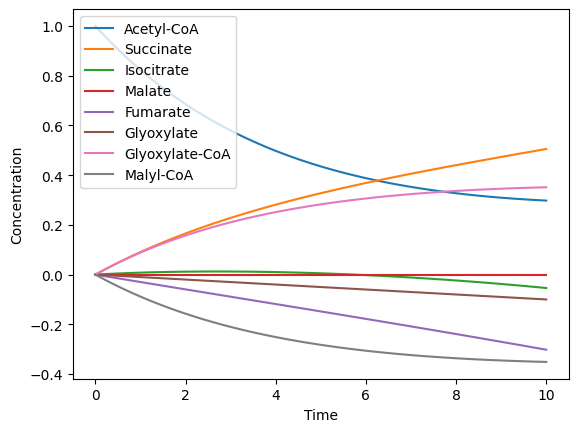

In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the ODE system for the glyoxylate shunt
def glyoxylate_shunt(y, t, params):
    # Unpack the state variables
    acetyl_coa, succinate, isocitrate, malate, fumarate, glyoxylate, glyoxylate_coa, malyl_coa, variable9, variable10 = y
    
    # Extract the parameters
    k1 = params['k1']
    k2 = params['k2']
    k3 = params['k3']
    k4 = params['k4']
    k5 = params['k5']
    nadh = params['nadh']
    nad = params['nad']
    coa = params['coa']
    nadp = params['nadp']
    nadph = params['nadph']
    
    # Define the rate equations
    rate1 = k1 * acetyl_coa * nad * coa - k2 * succinate * nadh
    rate2 = k3 * nadh - k4 * nad * nadh
    rate3 = k5 * isocitrate * nadp - k2 * succinate * nadh
    rate4 = k3 * nadh - k4 * nad * nadh
    rate5 = k5 * isocitrate * nadp - k4 * nad * nadh
    
    # Calculate the derivative of each state variable
    d_acetyl_coa = -2 * rate1
    d_succinate = rate1 - rate3
    d_isocitrate = -rate2 + rate3
    d_malate = rate2 - rate4
    d_fumarate = rate5
    d_glyoxylate = rate4
    d_glyoxylate_coa = rate1
    d_malyl_coa = -rate1
    
    return [d_acetyl_coa, d_succinate, d_isocitrate, d_malate, d_fumarate, d_glyoxylate, d_glyoxylate_coa, d_malyl_coa, 0.0, 0.0]

# Set the initial conditions
initial_conditions = [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  # [acetyl-CoA, succinate, isocitrate, malate, fumarate, glyoxylate, glyoxylate-CoA, malyl-CoA, variable9, variable10]

# Define the parameters
params = {
    'k1': 0.1,
    'k2': 0.05,
    'k3': 0.02,
    'k4': 0.03,
    'k5': 0.04,
    'nadh': 1.0,
    'nad': 1.0,
    'coa': 1.0,
    'nadp': 1.0,
    'nadph': 1.0
}

# Set the time points for simulation
t = np.linspace(0, 10, 100)  # Simulation time from 0 to 10 with 100 time points

# Solve the ODE system
solution = odeint(glyoxylate_shunt, initial_conditions, t, args=(params,))

# Extract the concentrations from the solution
acetyl_coa_conc = solution[:, 0]
succinate_conc = solution[:, 1]
isocitrate_conc = solution[:, 2]
malate_conc = solution[:, 3]
fumarate_conc = solution[:, 4]
glyoxylate_conc = solution[:, 5]
glyoxylate_coa_conc = solution[:, 6]
malyl_coa_conc = solution[:, 7]

# Plot the concentrations over time
plt.plot(t, acetyl_coa_conc, label='Acetyl-CoA')
plt.plot(t, succinate_conc, label='Succinate')
plt.plot(t, isocitrate_conc, label='Isocitrate')
plt.plot(t, malate_conc, label='Malate')
plt.plot(t, fumarate_conc, label='Fumarate')
plt.plot(t, glyoxylate_conc, label='Glyoxylate')
plt.plot(t, glyoxylate_coa_conc, label='Glyoxylate-CoA')
plt.plot(t, malyl_coa_conc, label='Malyl-CoA')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()


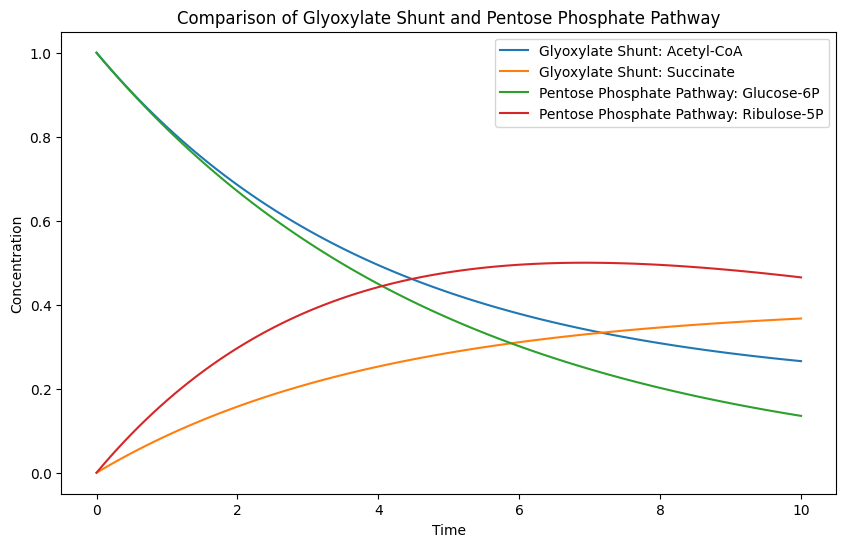

In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the ODE system for the glyoxylate shunt
def glyoxylate_shunt(y, t, params):
    # Unpack the state variables
    acetyl_coa, succinate = y
    
    # Extract the parameters
    k1 = params['k1']
    k2 = params['k2']
    nadh = params['nadh']
    nad = params['nad']
    coa = params['coa']
    
    # Define the rate equations
    rate1 = k1 * acetyl_coa * nad * coa - k2 * succinate * nadh
    d_acetyl_coa = -2 * rate1
    d_succinate = rate1
    
    return [d_acetyl_coa, d_succinate]

# Define the ODE system for the pentose phosphate pathway
def pentose_phosphate_pathway(y, t, params):
    # Unpack the state variables
    glucose_6p, ribulose_5p = y
    
    # Extract the parameters
    k3 = params['k3']
    k4 = params['k4']
    
    # Define the rate equations
    rate3 = k3 * glucose_6p
    rate4 = k4 * ribulose_5p
    
    d_glucose_6p = -rate3
    d_ribulose_5p = rate3 - rate4
    
    return [d_glucose_6p, d_ribulose_5p]

# Set the initial conditions
glyoxylate_initial_conditions = [1.0, 0.0]  # [acetyl-CoA, succinate]
pentose_phosphate_initial_conditions = [1.0, 0.0]  # [glucose-6P, ribulose-5P]

# Define the parameters
glyoxylate_params = {
    'k1': 0.1,
    'k2': 0.05,
    'nadh': 1.0,
    'nad': 1.0,
    'coa': 1.0,
}

pentose_phosphate_params = {
    'k3': 0.2,
    'k4': 0.1,
}

# Set the time points for simulation
t = np.linspace(0, 10, 100)  # Simulation time from 0 to 10 with 100 time points

# Solve the ODE systems
glyoxylate_solution = odeint(glyoxylate_shunt, glyoxylate_initial_conditions, t, args=(glyoxylate_params,))
pentose_phosphate_solution = odeint(pentose_phosphate_pathway, pentose_phosphate_initial_conditions, t, args=(pentose_phosphate_params,))

# Extract the concentrations from the solutions
glyoxylate_acetyl_coa_conc = glyoxylate_solution[:, 0]
glyoxylate_succinate_conc = glyoxylate_solution[:, 1]
pentose_phosphate_glucose_6p_conc = pentose_phosphate_solution[:, 0]
pentose_phosphate_ribulose_5p_conc = pentose_phosphate_solution[:, 1]

# Plot the concentrations over time
plt.figure(figsize=(10, 6))
plt.plot(t, glyoxylate_acetyl_coa_conc, label='Glyoxylate Shunt: Acetyl-CoA')
plt.plot(t, glyoxylate_succinate_conc, label='Glyoxylate Shunt: Succinate')
plt.plot(t, pentose_phosphate_glucose_6p_conc, label='Pentose Phosphate Pathway: Glucose-6P')
plt.plot(t, pentose_phosphate_ribulose_5p_conc, label='Pentose Phosphate Pathway: Ribulose-5P')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Comparison of Glyoxylate Shunt and Pentose Phosphate Pathway')
plt.legend()
plt.show()


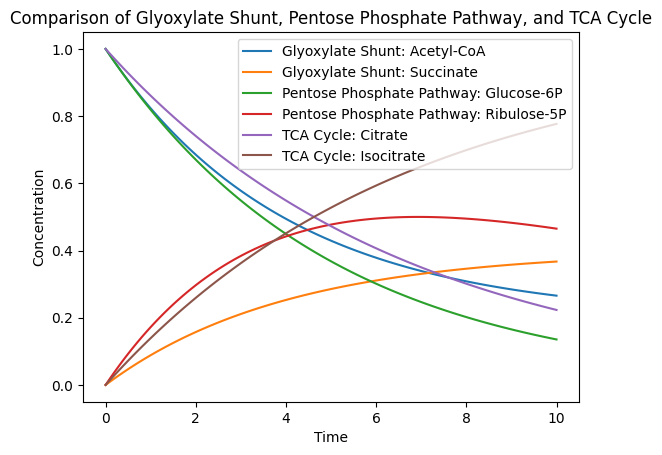

In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the ODE system for the glyoxylate shunt
def glyoxylate_shunt(y, t, params):
    acetyl_coa, succinate = y
    k1 = params['k1']
    k2 = params['k2']
    nadh = params['nadh']
    nad = params['nad']
    coa = params['coa']
    
    rate1 = k1 * acetyl_coa * nad * coa - k2 * succinate * nadh
    d_acetyl_coa = -2 * rate1
    d_succinate = rate1
    
    return [d_acetyl_coa, d_succinate]

# Define the ODE system for the pentose phosphate pathway
def pentose_phosphate_pathway(y, t, params):
    glucose_6p, ribulose_5p = y
    k3 = params['k3']
    k4 = params['k4']
    
    rate3 = k3 * glucose_6p
    rate4 = k4 * ribulose_5p
    
    d_glucose_6p = -rate3
    d_ribulose_5p = rate3 - rate4
    
    return [d_glucose_6p, d_ribulose_5p]

# Define the ODE system for the tricarboxylic acid (TCA) cycle
def tca_cycle(y, t, params):
    citrate, isocitrate = y
    k5 = params['k5']
    
    rate5 = k5 * citrate
    
    d_citrate = -rate5
    d_isocitrate = rate5
    
    return [d_citrate, d_isocitrate]

# Set the initial conditions
glyoxylate_initial_conditions = [1.0, 0.0]  # [acetyl-CoA, succinate]
pentose_phosphate_initial_conditions = [1.0, 0.0]  # [glucose-6P, ribulose-5P]
tca_cycle_initial_conditions = [1.0, 0.0]  # [citrate, isocitrate]

# Define the parameters
glyoxylate_params = {
    'k1': 0.1,
    'k2': 0.05,
    'nadh': 1.0,
    'nad': 1.0,
    'coa': 1.0,
}

pentose_phosphate_params = {
    'k3': 0.2,
    'k4': 0.1,
}

tca_cycle_params = {
    'k5': 0.15,
}

# Set the time points for simulation
t = np.linspace(0, 10, 100)

# Solve the ODE systems
glyoxylate_solution = odeint(glyoxylate_shunt, glyoxylate_initial_conditions, t, args=(glyoxylate_params,))
pentose_phosphate_solution = odeint(pentose_phosphate_pathway, pentose_phosphate_initial_conditions, t, args=(pentose_phosphate_params,))
tca_cycle_solution = odeint(tca_cycle, tca_cycle_initial_conditions, t, args=(tca_cycle_params,))

# Extract the concentrations from the solutions
glyoxylate_acetyl_coa_conc = glyoxylate_solution[:, 0]
glyoxylate_succinate_conc = glyoxylate_solution[:, 1]
pentose_phosphate_glucose_6p_conc = pentose_phosphate_solution[:, 0]
pentose_phosphate_ribulose_5p_conc = pentose_phosphate_solution[:, 1]
tca_cycle_citrate_conc = tca_cycle_solution[:, 0]
tca_cycle_isocitrate_conc = tca_cycle_solution[:, 1]

# Plot the concentrations over time
plt.plot(t, glyoxylate_acetyl_coa_conc, label='Glyoxylate Shunt: Acetyl-CoA')
plt.plot(t, glyoxylate_succinate_conc, label='Glyoxylate Shunt: Succinate')
plt.plot(t, pentose_phosphate_glucose_6p_conc, label='Pentose Phosphate Pathway: Glucose-6P')
plt.plot(t, pentose_phosphate_ribulose_5p_conc, label='Pentose Phosphate Pathway: Ribulose-5P')
plt.plot(t, tca_cycle_citrate_conc, label='TCA Cycle: Citrate')
plt.plot(t, tca_cycle_isocitrate_conc, label='TCA Cycle: Isocitrate')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Comparison of Glyoxylate Shunt, Pentose Phosphate Pathway, and TCA Cycle')
plt.legend()
plt.show()


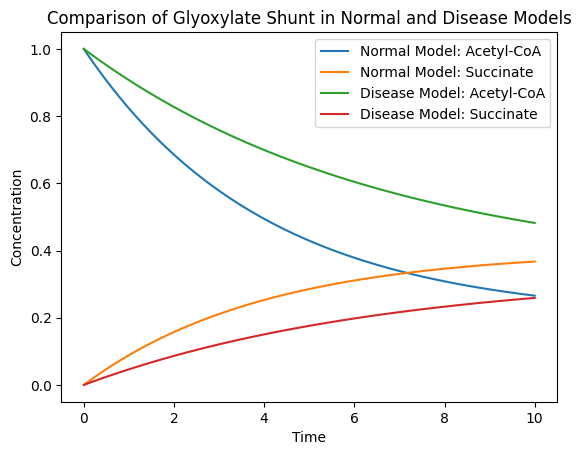

In [8]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the ODE system for the glyoxylate shunt
def glyoxylate_shunt(y, t, k1, k2, nadh, nad, coa):
    acetyl_coa, succinate = y
    
    # Normal model parameters
    rate1 = k1 * acetyl_coa * nad * coa - k2 * succinate * nadh
    
    d_acetyl_coa = -2 * rate1
    d_succinate = rate1
    
    return [d_acetyl_coa, d_succinate]

# Set the initial conditions and parameters for the normal model
normal_initial_conditions = [1.0, 0.0]  # [acetyl-CoA, succinate]
normal_k1 = 0.1
normal_k2 = 0.05
normal_nadh = 1.0
normal_nad = 1.0
normal_coa = 1.0

# Set the initial conditions and parameters for the disease model
disease_initial_conditions = [1.0, 0.0]  # [acetyl-CoA, succinate]
disease_k1 = 0.05  # Decreased value of k1 in the disease model
disease_k2 = 0.1  # Increased value of k2 in the disease model
disease_nadh = 0.5  # Decreased value of nadh in the disease model
disease_nad = 1.0
disease_coa = 1.0

# Set the time points for simulation
t = np.linspace(0, 10, 100)

# Solve the ODE system for the normal model
normal_solution = odeint(glyoxylate_shunt, normal_initial_conditions, t, args=(normal_k1, normal_k2, normal_nadh, normal_nad, normal_coa))

# Solve the ODE system for the disease model
disease_solution = odeint(glyoxylate_shunt, disease_initial_conditions, t, args=(disease_k1, disease_k2, disease_nadh, disease_nad, disease_coa))

# Extract the concentrations from the solutions
normal_acetyl_coa_conc = normal_solution[:, 0]
normal_succinate_conc = normal_solution[:, 1]
disease_acetyl_coa_conc = disease_solution[:, 0]
disease_succinate_conc = disease_solution[:, 1]

# Plot the concentrations over time
plt.plot(t, normal_acetyl_coa_conc, label='Normal Model: Acetyl-CoA')
plt.plot(t, normal_succinate_conc, label='Normal Model: Succinate')
plt.plot(t, disease_acetyl_coa_conc, label='Disease Model: Acetyl-CoA')
plt.plot(t, disease_succinate_conc, label='Disease Model: Succinate')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Comparison of Glyoxylate Shunt in Normal and Disease Models')
plt.legend()
plt.show()


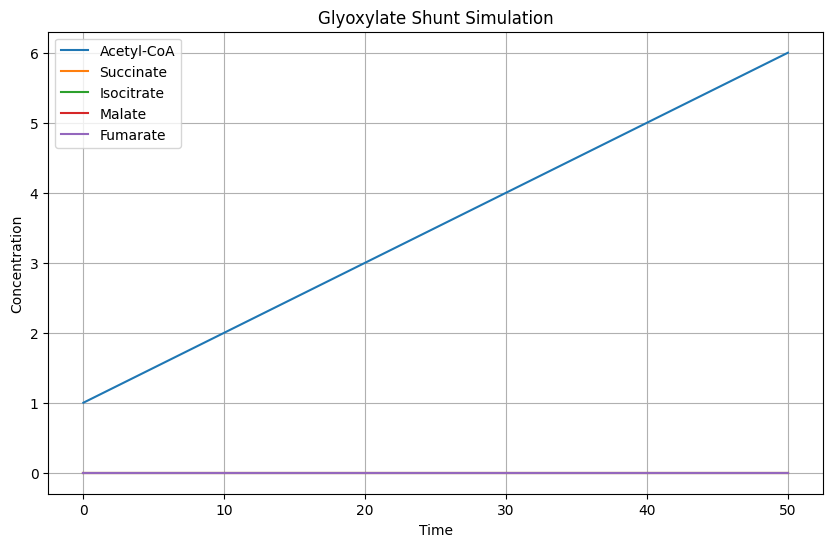

In [12]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the ODE system for the glyoxylate shunt
def glyoxylate_shunt(y, t, k1, k2, k3, k4, k5, k6, k7):
    acetyl_coa, succinate, isocitrate, malate, fumarate = y
    d_acetyl_coa = k1 - k2 * acetyl_coa * succinate
    d_succinate = k3 * acetyl_coa * succinate - k4 * succinate + k5 * isocitrate
    d_isocitrate = k4 * succinate - k5 * isocitrate - k6 * isocitrate * fumarate
    d_malate = k5 * isocitrate - k3 * acetyl_coa * malate
    d_fumarate = k6 * isocitrate * fumarate - k7 * fumarate
    return [d_acetyl_coa, d_succinate, d_isocitrate, d_malate, d_fumarate]

# Set the initial conditions and parameters
initial_conditions = [1.0, 0.0, 0.0, 0.0, 0.0]  # [acetyl-CoA, succinate, isocitrate, malate, fumarate]
k1 = 0.1
k2 = 0.05
k3 = 0.02
k4 = 0.03
k5 = 0.04
k6 = 0.06
k7 = 0.08

# Set the time points for simulation
t = np.linspace(0, 50, 1000)  # Simulation time from 0 to 50 with 1000 time points

# Solve the ODE system
solution = odeint(glyoxylate_shunt, initial_conditions, t, args=(k1, k2, k3, k4, k5, k6, k7))

# Extract the concentrations from the solution
acetyl_coa_conc = solution[:, 0]
succinate_conc = solution[:, 1]
isocitrate_conc = solution[:, 2]
malate_conc = solution[:, 3]
fumarate_conc = solution[:, 4]

# Plot the concentrations over time
plt.figure(figsize=(10, 6))
plt.plot(t, acetyl_coa_conc, label='Acetyl-CoA')
plt.plot(t, succinate_conc, label='Succinate')
plt.plot(t, isocitrate_conc, label='Isocitrate')
plt.plot(t, malate_conc, label='Malate')
plt.plot(t, fumarate_conc, label='Fumarate')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.title('Glyoxylate Shunt Simulation')
plt.grid(True)
plt.show()
